In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Read & Understanding the Data

In [209]:
#Read dataset
bikeSharingData = pd.read_csv("day.csv")
bikeSharingData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [210]:
bikeSharingData.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


# Inspect the data

In [212]:
bikeSharingData.shape

(730, 16)

In [213]:
bikeSharingData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [214]:
bikeSharingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Observations

1. Dataframe has 730 rows & 16 columns
2. Except one column, all other are either float or integer type
3. One column is object type
4. Looking at the data few columns are categorical in nature, but in interger or float

# Data Cleaning
## Drop columns that are not useful for data analysisues

1. instant: as it is the record index
2. dteday: as the features of date like yr month and weekday are already available
3. casual and registered as the are in cnt, because cnt is sum of both the values

In [219]:
bikeSharingData.drop(bikeSharingData[["instant", "casual", "dteday", "registered"]], axis=1, inplace=True)

In [220]:
bikeSharingData.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Missing Value and Outlier Check

In [222]:
bikeSharingData.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

No null values are present

<Axes: ylabel='windspeed'>

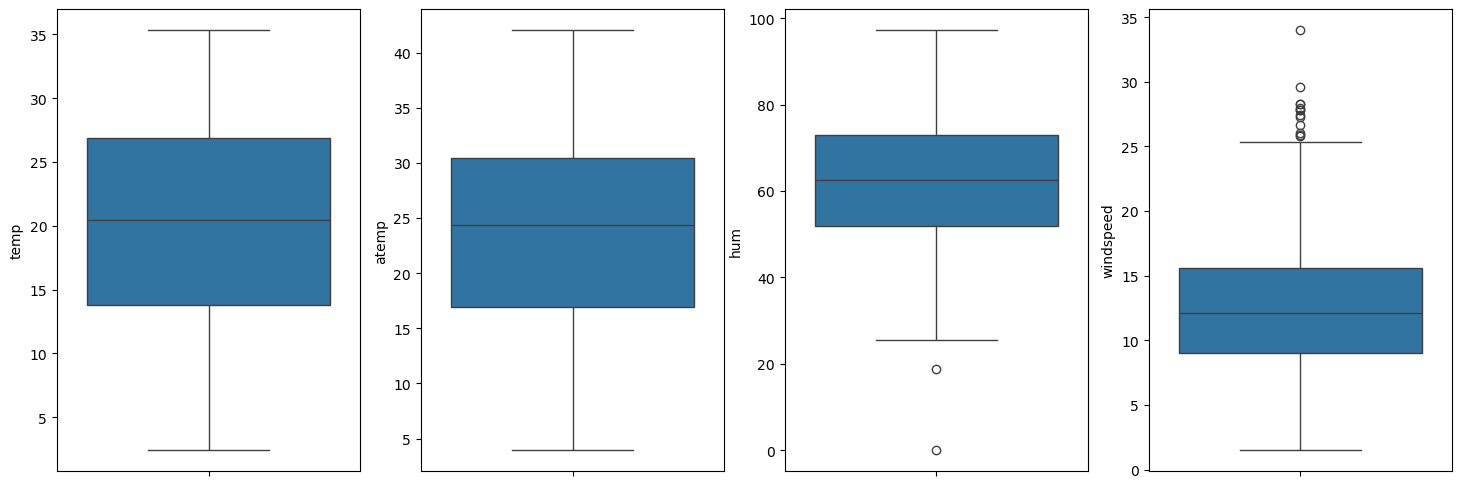

In [224]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
sns.boxplot(bikeSharingData['temp'])

plt.subplot(1,4,2)
sns.boxplot(bikeSharingData['atemp'])

plt.subplot(1,4,3)
sns.boxplot(bikeSharingData['hum'])

plt.subplot(1,4,4)
sns.boxplot(bikeSharingData['windspeed'])

# Observations: 
From the above plots we can say that we don't have any outliers

# Performing EDA

### Visualize numerical columns using Pairplots

In [228]:
bikeSharingData.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

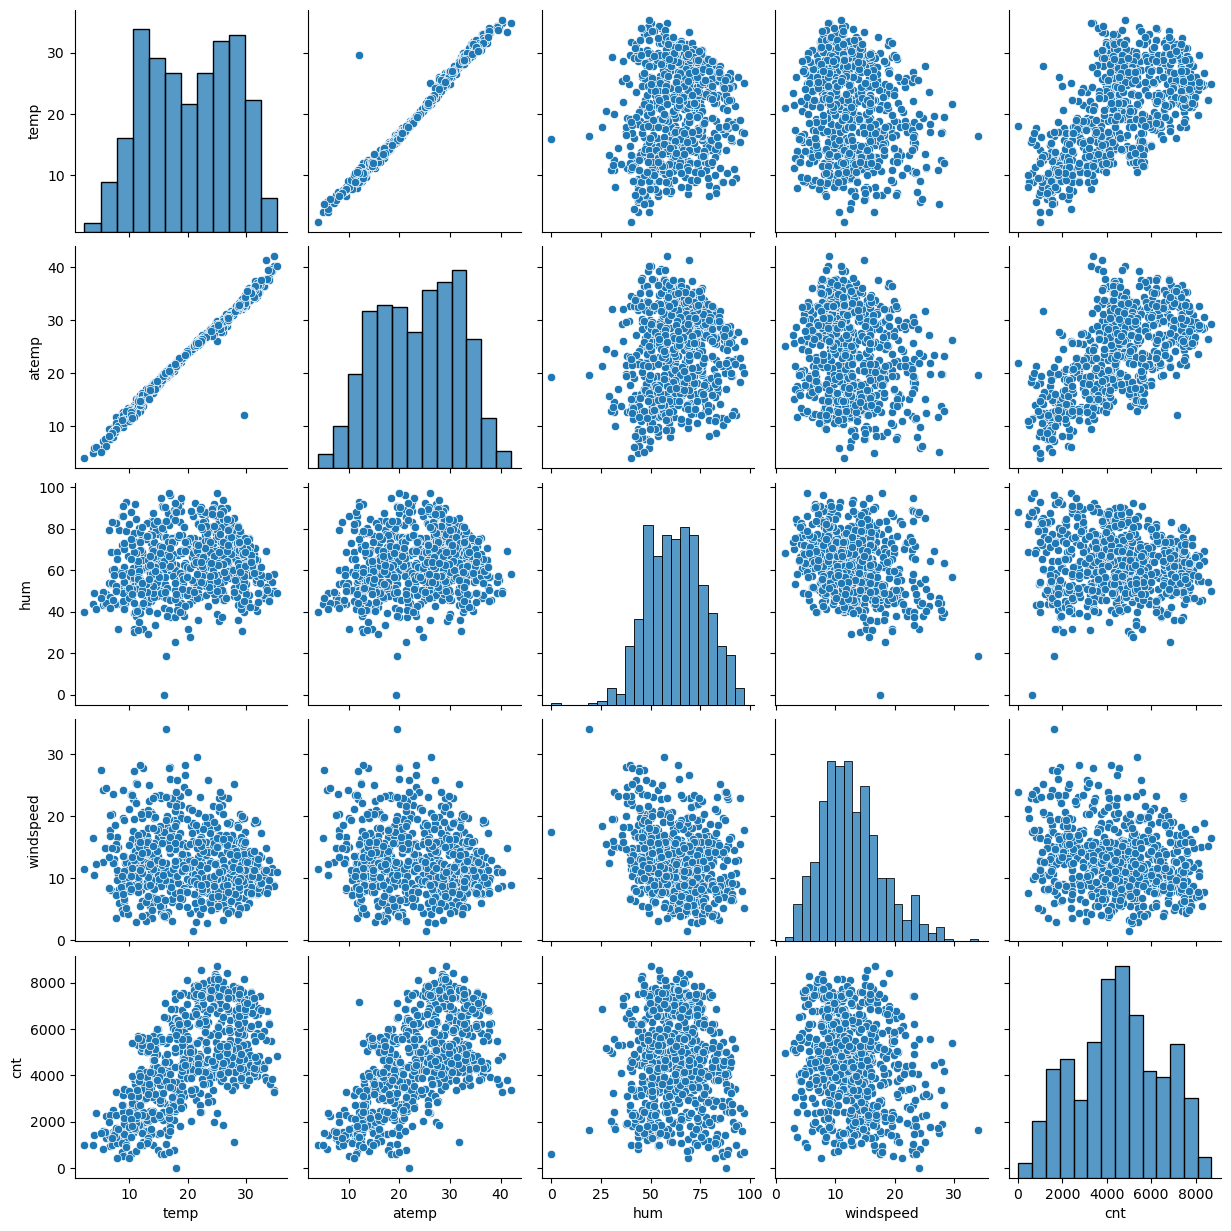

In [229]:
sns.pairplot(bikeSharingData, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

## Observations:
### From above plots we can say that there is relationship between temp, atemp & cnt. Hence checking correlation

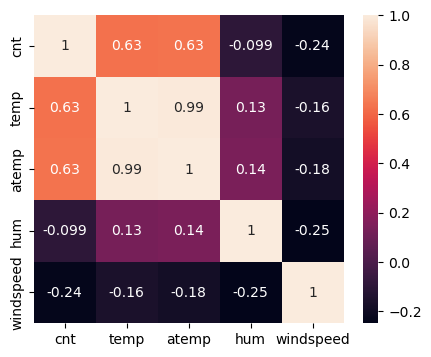

In [231]:
plt.figure(figsize=(5,4))
sns.heatmap(bikeSharingData[["cnt", "temp", "atemp", "hum", "windspeed"]].corr(), annot=True)
plt.show()

### Visualize categorical columns using sns.boxplot()

In [233]:
#Changing categorical data with meaningful values
bikeSharingData.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharingData.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharingData.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bikeSharingData.weekday.replace({0: 'sunday',1: 'monday',2: 'tuesday',3: 'wednesday',4: 'thursday',5: 'friday',6: 'saturday'},inplace = True)
bikeSharingData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,good,9.305237,11.46350,43.6957,12.522300,1600


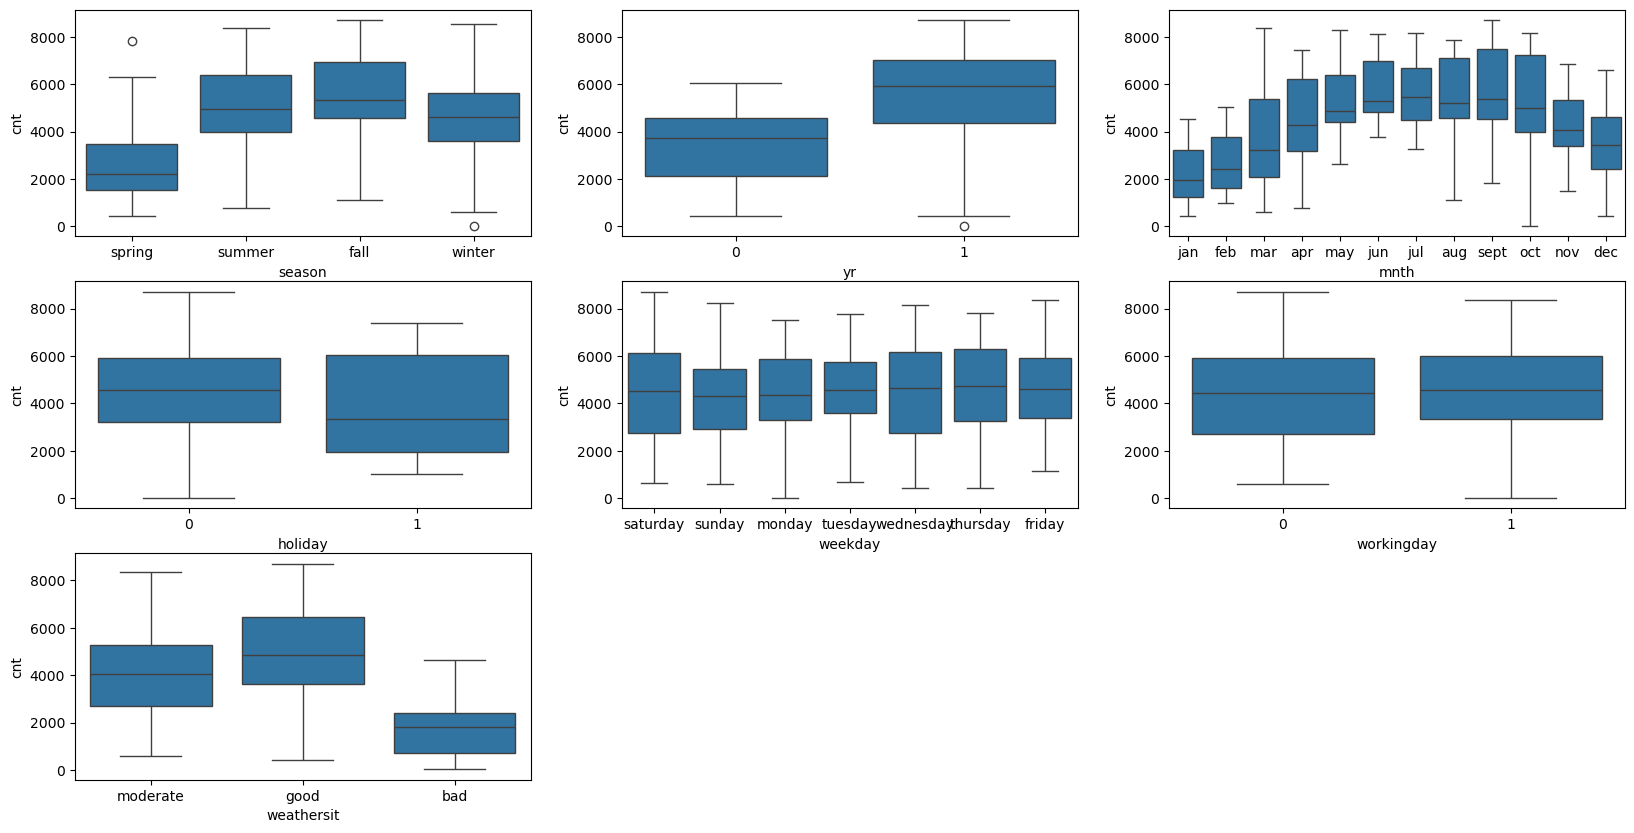

In [234]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x="season", y="cnt", data=bikeSharingData)

plt.subplot(3,3,2)
sns.boxplot(x="yr", y="cnt", data=bikeSharingData)

plt.subplot(3,3,3)
sns.boxplot(x="mnth", y="cnt", data=bikeSharingData)

plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="cnt", data=bikeSharingData)

plt.subplot(3,3,5)
sns.boxplot(x="weekday", y="cnt", data=bikeSharingData)

plt.subplot(3,3,6)
sns.boxplot(x="workingday", y="cnt", data=bikeSharingData)

plt.subplot(3,3,7)
sns.boxplot(x="weathersit", y="cnt", data=bikeSharingData)

plt.show()

# Data preparation for linear regression

In [236]:
# Creating dummy variables for categorical variables

bikeSharingData = pd.get_dummies(data=bikeSharingData,columns=["weathersit"])
bikeSharingData = pd.get_dummies(data = bikeSharingData, columns=["season","mnth","weekday"], drop_first = True)
bikeSharingData.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [237]:
bikeSharingData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,True,...,False,False,False,False,False,False,False,False,False,True


In [238]:
bikeSharingData = bikeSharingData.applymap(lambda x: 1 if x == True else x)
bikeSharingData = bikeSharingData.applymap(lambda x: 0 if x == False else x)

In [239]:
bikeSharingData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,1


In [240]:
bikeSharingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   weathersit_bad       730 non-null    int64  
 9   weathersit_good      730 non-null    int64  
 10  weathersit_moderate  730 non-null    int64  
 11  season_spring        730 non-null    int64  
 12  season_summer        730 non-null    int64  
 13  season_winter        730 non-null    int64  
 14  mnth_aug             730 non-null    int64  
 15  mnth_dec             730 non-null    int

## Split data into train & test

In [242]:
bikeSharingData_train, bikeSharingData_test = train_test_split(bikeSharingData, train_size = 0.7, test_size = 0.3, random_state = 42)
print(bikeSharingData_train.shape)
print(bikeSharingData_test.shape)

(510, 31)
(219, 31)


In [243]:
# Rescaling numeric variables
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaling_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bikeSharingData_train[scaling_cols] = scaler.fit_transform(bikeSharingData_train[scaling_cols])

In [244]:
bikeSharingData_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,0,1,0,0,0,0,0,1,0,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,1,0,1,0,0,0,0,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,0,...,0,0,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,1,0,0,0,0,0,0,1


In [245]:
bikeSharingData_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206,0.029412,0.625490,...,0.092157,0.092157,0.090196,0.090196,0.149020,0.150980,0.152941,0.147059,0.131373,0.139216
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905,0.169124,0.484471,...,0.289531,0.289531,0.286744,0.286744,0.356457,0.358381,0.360284,0.354512,0.338139,0.346511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [247]:
y_train = bikeSharingData_train.pop('cnt')
X_train = bikeSharingData_train

## Building Linear Model

In [249]:
# Adding constant

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_m1 = sm.OLS(y_train, X_train_lm).fit()

In [250]:
lr_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.60
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          6.99e-177
Time:                        13:27:15   Log-Likelihood:                 497.64
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     481   BIC:                            -814.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1302      0.033      3.899      0.000       0.065       0.196
yr                      0.2357      0.009     27.529      0.000       0.219       0.252
holiday                -0.0094      0.024     -0.389      0.697      -0.057       0.038
workingday              0.0654      0.013      5.129      0.000       0.040       0.090
temp                    0.1855      0.271      0.685      0.494      -0.346       0.717
atemp                   0.2746      0.278      0.989      0.323      -0.271       0.820
hum                    -0.1641      0.041     -3.963      0.000      -0.245      -0.083
windspeed              -0.1128      0.026     -4.276      0.000      -0.165      -0.061
weathersit_bad         -0.0885      0.024     -3.698      0.000      -0.136      -0.041
weathersit_good         0.1385      0.012     11.131      0.000       0.114       0.163
weathersit_moderate     0.0802      0.014      5.679      0.000       0.052       0.108
season_spring          -0.1472      0.033     -4.513      0.000      -0.211      -0.083
season_summer           0.0112      0.027      0.412      0.680      -0.042       0.065
season_winter           0.0768      0.028      2.769      0.006       0.022       0.131
mnth_aug               -0.0091      0.036     -0.251      0.802      -0.081       0.062
mnth_dec               -0.0379      0.037     -1.037      0.300      -0.110       0.034
mnth_feb                0.0174      0.037      0.469      0.639      -0.055       0.090
mnth_jan                0.0023      0.038      0.062      0.951      -0.072       0.076
mnth_jul               -0.0413      0.037     -1.131      0.259      -0.113       0.030
mnth_jun                0.0020      0.026      0.077      0.938      -0.050       0.054
mnth_mar                0.0564      0.029      1.943      0.053      -0.001       0.113
mnth_may                0.0318      0.022      1.472      0.142      -0.011       0.074
mnth_nov               -0.0505      0.039     -1.306      0.192      -0.126       0.025
mnth_oct                0.0388      0.038      1.021      0.308      -0.036       0.113
mnth_sept               0.0759      0.034      2.263      0.024       0.010       0.142
weekday_monday         -0.0198      0.016     -1.217      0.224      -0.052       0.012
weekday_saturday        0.0607      0.014      4.411      0.000       0.034       0.088
weekday_sunday          0.0135      0.014      0.952      0.342      -0.014       0.041
weekday_thursday       -0.0068      0.016     -0.424      0.672      -0.038       0.025
weekday_tuesday        -0.0278      0.016     -1.690      0.092      -0.060       0.005
weekday_wednesday      -0.0087      0.016     -0.533      0.594      -0.041       0.023
==============================================================================
Omnibus:    

In [251]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,weekday_saturday,inf
2,workingday,inf
7,weathersit_bad,inf
8,weathersit_good,inf
9,weathersit_moderate,inf
26,weekday_sunday,inf
1,holiday,inf
3,temp,218.76
4,atemp,202.02
10,season_spring,10.94


In [252]:
#dropping column temp as it has higher p_value & vif

X = X_train.drop("temp", axis =1)
X.head()

,yr,holiday,workingday,atemp,hum,windspeed,weathersit_bad,weathersit_good,weathersit_moderate,season_spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
683,1,0,1,0.322150,0.639330,0.327101,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
645,1,1,0,0.404998,0.731215,0.419004,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
163,0,0,1,0.685963,0.509660,0.708724,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.326273,0.785745,0.415925,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
640,1,0,1,0.682653,0.817947,0.110593,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [253]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [254]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.23
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.76e-178
Time:                        13:27:16   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     482   BIC:                            -820.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1312      0.033      3.936      0.000       0.066       0.197
yr                      0.2360      0.009     27.623      0.000       0.219       0.253
holiday                -0.0076      0.024     -0.317      0.752      -0.055       0.040
workingday              0.0650      0.013      5.106      0.000       0.040       0.090
atemp                   0.4617      0.050      9.268      0.000       0.364       0.560
hum                    -0.1650      0.041     -3.989      0.000      -0.246      -0.084
windspeed              -0.1072      0.025     -4.274      0.000      -0.157      -0.058
weathersit_bad         -0.0870      0.024     -3.653      0.000      -0.134      -0.040
weathersit_good         0.1381      0.012     11.118      0.000       0.114       0.163
weathersit_moderate     0.0802      0.014      5.677      0.000       0.052       0.108
season_spring          -0.1473      0.033     -4.517      0.000      -0.211      -0.083
season_summer           0.0101      0.027      0.372      0.710      -0.043       0.063
season_winter           0.0767      0.028      2.765      0.006       0.022       0.131
mnth_aug               -0.0035      0.035     -0.099      0.922      -0.073       0.066
mnth_dec               -0.0398      0.036     -1.094      0.275      -0.111       0.032
mnth_feb                0.0159      0.037      0.429      0.668      -0.057       0.088
mnth_jan                0.0011      0.038      0.030      0.976      -0.073       0.075
mnth_jul               -0.0362      0.036     -1.013      0.312      -0.106       0.034
mnth_jun                0.0081      0.025      0.326      0.744      -0.041       0.057
mnth_mar                0.0559      0.029      1.926      0.055      -0.001       0.113
mnth_may                0.0347      0.021      1.640      0.102      -0.007       0.076
mnth_nov               -0.0520      0.039     -1.348      0.178      -0.128       0.024
mnth_oct                0.0387      0.038      1.021      0.308      -0.036       0.113
mnth_sept               0.0796      0.033      2.402      0.017       0.014       0.145
weekday_monday         -0.0204      0.016     -1.254      0.210      -0.052       0.012
weekday_saturday        0.0605      0.014      4.399      0.000       0.033       0.087
weekday_sunday          0.0133      0.014      0.942      0.347      -0.014       0.041
weekday_thursday       -0.0066      0.016     -0.414      0.679      -0.038       0.025
weekday_tuesday        -0.0271      0.016     -1.649      0.100      -0.059       0.005
weekday_wednesday      -0.0077      0.016     -0.476      0.634      -0.040       0.024
==============================================================================
Omnibus:                       86.680   Durbin-Watson:                   2.064
Prob(Omnibus):       

In [255]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weekday_saturday,inf
2,workingday,inf
6,weathersit_bad,inf
7,weathersit_good,inf
8,weathersit_moderate,inf
25,weekday_sunday,inf
1,holiday,inf
9,season_spring,10.94
11,season_winter,8.37
10,season_summer,8.13


In [256]:
#dropping column holiday as it has higher p_value & vif

X = X.drop("holiday", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.23
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.76e-178
Time:                        13:27:16   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     482   BIC:                            -820.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1255      0.045      2.799      0.005       0.037       0.214
yr                      0.2360      0.009     27.623      0.000       0.219       0.253
workingday              0.0726      0.027      2.678      0.008       0.019       0.126
atemp                   0.4617      0.050      9.268      0.000       0.364       0.560
hum                    -0.1650      0.041     -3.989      0.000      -0.246      -0.084
windspeed              -0.1072      0.025     -4.274      0.000      -0.157      -0.058
weathersit_bad         -0.0889      0.026     -3.379      0.001      -0.141      -0.037
weathersit_good         0.1362      0.015      8.908      0.000       0.106       0.166
weathersit_moderate     0.0783      0.017      4.554      0.000       0.044       0.112
season_spring          -0.1473      0.033     -4.517      0.000      -0.211      -0.083
season_summer           0.0101      0.027      0.372      0.710      -0.043       0.063
season_winter           0.0767      0.028      2.765      0.006       0.022       0.131
mnth_aug               -0.0035      0.035     -0.099      0.922      -0.073       0.066
mnth_dec               -0.0398      0.036     -1.094      0.275      -0.111       0.032
mnth_feb                0.0159      0.037      0.429      0.668      -0.057       0.088
mnth_jan                0.0011      0.038      0.030      0.976      -0.073       0.075
mnth_jul               -0.0362      0.036     -1.013      0.312      -0.106       0.034
mnth_jun                0.0081      0.025      0.326      0.744      -0.041       0.057
mnth_mar                0.0559      0.029      1.926      0.055      -0.001       0.113
mnth_may                0.0347      0.021      1.640      0.102      -0.007       0.076
mnth_nov               -0.0520      0.039     -1.348      0.178      -0.128       0.024
mnth_oct                0.0387      0.038      1.021      0.308      -0.036       0.113
mnth_sept               0.0796      0.033      2.402      0.017       0.014       0.145
weekday_monday         -0.0204      0.016     -1.254      0.210      -0.052       0.012
weekday_saturday        0.0681      0.031      2.194      0.029       0.007       0.129
weekday_sunday          0.0209      0.031      0.675      0.500      -0.040       0.082
weekday_thursday       -0.0066      0.016     -0.414      0.679      -0.038       0.025
weekday_tuesday        -0.0271      0.016     -1.649      0.100      -0.059       0.005
weekday_wednesday      -0.0077      0.016     -0.476      0.634      -0.040       0.024
==============================================================================
Omnibus:                       86.680   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.508
Skew:                         

In [257]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,117.00
7,weathersit_moderate,71.48
8,season_spring,10.94
1,workingday,9.43
10,season_winter,8.37
9,season_summer,8.13
5,weathersit_bad,7.62
19,mnth_nov,7.21
24,weekday_sunday,7.20
23,weekday_saturday,7.14


In [258]:
#dropping column mnth_jan as it has higher p_value & vif

X = X.drop("mnth_jan", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.54e-179
Time:                        13:27:16   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -940.8
Df Residuals:                     483   BIC:                            -826.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1260      0.042      2.993      0.003       0.043       0.209
yr                      0.2360      0.009     27.721      0.000       0.219       0.253
workingday              0.0726      0.027      2.681      0.008       0.019       0.126
atemp                   0.4612      0.047      9.859      0.000       0.369       0.553
hum                    -0.1649      0.041     -4.012      0.000      -0.246      -0.084
windspeed              -0.1073      0.025     -4.293      0.000      -0.156      -0.058
weathersit_bad         -0.0888      0.026     -3.425      0.001      -0.140      -0.038
weathersit_good         0.1364      0.014      9.682      0.000       0.109       0.164
weathersit_moderate     0.0784      0.016      4.785      0.000       0.046       0.111
season_spring          -0.1469      0.029     -4.980      0.000      -0.205      -0.089
season_summer           0.0098      0.026      0.381      0.704      -0.041       0.061
season_winter           0.0769      0.027      2.872      0.004       0.024       0.129
mnth_aug               -0.0038      0.034     -0.111      0.911      -0.071       0.063
mnth_dec               -0.0406      0.025     -1.655      0.099      -0.089       0.008
mnth_feb                0.0149      0.020      0.745      0.457      -0.024       0.054
mnth_jul               -0.0365      0.035     -1.053      0.293      -0.105       0.032
mnth_jun                0.0079      0.024      0.326      0.744      -0.040       0.056
mnth_mar                0.0553      0.020      2.748      0.006       0.016       0.095
mnth_may                0.0346      0.021      1.663      0.097      -0.006       0.075
mnth_nov               -0.0527      0.031     -1.712      0.088      -0.113       0.008
mnth_oct                0.0381      0.032      1.204      0.229      -0.024       0.100
mnth_sept               0.0792      0.030      2.617      0.009       0.020       0.139
weekday_monday         -0.0204      0.016     -1.259      0.209      -0.052       0.011
weekday_saturday        0.0680      0.031      2.196      0.029       0.007       0.129
weekday_sunday          0.0209      0.031      0.675      0.500      -0.040       0.082
weekday_thursday       -0.0066      0.016     -0.415      0.679      -0.038       0.025
weekday_tuesday        -0.0271      0.016     -1.651      0.099      -0.059       0.005
weekday_wednesday      -0.0078      0.016     -0.477      0.633      -0.040       0.024
==============================================================================
Omnibus:                       86.708   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.682
Skew:                          -0.877   Prob(JB):                     7.99e-46
Kurtosis:                       5.588  

In [259]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,100.58
7,weathersit_moderate,63.08
1,workingday,9.43
8,season_spring,8.97
10,season_winter,7.82
9,season_summer,7.41
23,weekday_sunday,7.18
22,weekday_saturday,7.13
5,weathersit_bad,6.96
14,mnth_jul,5.82


In [260]:
#dropping column mnth_aug as it has higher p_value & vif

X = X.drop("mnth_aug", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.19e-180
Time:                        13:27:17   Log-Likelihood:                 497.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     484   BIC:                            -832.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1246      0.040      3.104      0.002       0.046       0.203
yr                      0.2361      0.008     27.797      0.000       0.219       0.253
workingday              0.0726      0.027      2.682      0.008       0.019       0.126
atemp                   0.4592      0.043     10.618      0.000       0.374       0.544
hum                    -0.1646      0.041     -4.017      0.000      -0.245      -0.084
windspeed              -0.1071      0.025     -4.297      0.000      -0.156      -0.058
weathersit_bad         -0.0893      0.025     -3.505      0.000      -0.139      -0.039
weathersit_good         0.1360      0.014      9.984      0.000       0.109       0.163
weathersit_moderate     0.0779      0.016      4.939      0.000       0.047       0.109
season_spring          -0.1451      0.025     -5.878      0.000      -0.194      -0.097
season_summer           0.0119      0.018      0.644      0.520      -0.024       0.048
season_winter           0.0778      0.025      3.074      0.002       0.028       0.128
mnth_dec               -0.0397      0.023     -1.715      0.087      -0.085       0.006
mnth_feb                0.0153      0.020      0.770      0.442      -0.024       0.054
mnth_jul               -0.0333      0.020     -1.668      0.096      -0.073       0.006
mnth_jun                0.0096      0.019      0.495      0.621      -0.028       0.048
mnth_mar                0.0557      0.020      2.843      0.005       0.017       0.094
mnth_may                0.0353      0.020      1.804      0.072      -0.003       0.074
mnth_nov               -0.0514      0.028     -1.812      0.071      -0.107       0.004
mnth_oct                0.0397      0.028      1.414      0.158      -0.015       0.095
mnth_sept               0.0818      0.019      4.246      0.000       0.044       0.120
weekday_monday         -0.0204      0.016     -1.259      0.209      -0.052       0.011
weekday_saturday        0.0681      0.031      2.200      0.028       0.007       0.129
weekday_sunday          0.0208      0.031      0.674      0.500      -0.040       0.081
weekday_thursday       -0.0065      0.016     -0.408      0.683      -0.038       0.025
weekday_tuesday        -0.0270      0.016     -1.650      0.100      -0.059       0.005
weekday_wednesday      -0.0077      0.016     -0.474      0.636      -0.040       0.024
==============================================================================
Omnibus:                       86.801   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.397
Skew:                          -0.877   Prob(JB):                     5.59e-46
Kurtosis:                       5.595   Cond. No.                     8.23e+15
================================================

In [261]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,91.21
7,weathersit_moderate,57.36
1,workingday,9.43
22,weekday_sunday,7.18
21,weekday_saturday,7.13
10,season_winter,7.01
5,weathersit_bad,6.46
8,season_spring,6.30
2,atemp,4.93
17,mnth_nov,3.91


In [262]:
#dropping column weekday_sunday as it has higher p_value & vif

X = X.drop("weekday_sunday", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          9.58e-181
Time:                        13:27:17   Log-Likelihood:                 497.15
No. Observations:                 510   AIC:                            -944.3
Df Residuals:                     485   BIC:                            -838.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1382      0.035      3.985      0.000       0.070       0.206
yr                      0.2360      0.008     27.806      0.000       0.219       0.253
workingday              0.0569      0.014      4.118      0.000       0.030       0.084
atemp                   0.4589      0.043     10.618      0.000       0.374       0.544
hum                    -0.1641      0.041     -4.008      0.000      -0.245      -0.084
windspeed              -0.1061      0.025     -4.266      0.000      -0.155      -0.057
weathersit_bad         -0.0848      0.025     -3.451      0.001      -0.133      -0.037
weathersit_good         0.1405      0.012     11.853      0.000       0.117       0.164
weathersit_moderate     0.0825      0.014      5.788      0.000       0.054       0.110
season_spring          -0.1460      0.025     -5.926      0.000      -0.194      -0.098
season_summer           0.0116      0.018      0.630      0.529      -0.025       0.048
season_winter           0.0787      0.025      3.115      0.002       0.029       0.128
mnth_dec               -0.0405      0.023     -1.752      0.080      -0.086       0.005
mnth_feb                0.0159      0.020      0.804      0.422      -0.023       0.055
mnth_jul               -0.0334      0.020     -1.670      0.096      -0.073       0.006
mnth_jun                0.0099      0.019      0.510      0.610      -0.028       0.048
mnth_mar                0.0563      0.020      2.874      0.004       0.018       0.095
mnth_may                0.0352      0.020      1.800      0.072      -0.003       0.074
mnth_nov               -0.0529      0.028     -1.875      0.061      -0.108       0.003
mnth_oct                0.0384      0.028      1.369      0.172      -0.017       0.093
mnth_sept               0.0813      0.019      4.227      0.000       0.044       0.119
weekday_monday         -0.0253      0.014     -1.755      0.080      -0.054       0.003
weekday_saturday        0.0497      0.015      3.378      0.001       0.021       0.079
weekday_thursday       -0.0094      0.015     -0.615      0.539      -0.040       0.021
weekday_tuesday        -0.0299      0.016     -1.899      0.058      -0.061       0.001
weekday_wednesday      -0.0104      0.016     -0.661      0.509      -0.041       0.020
==============================================================================
Omnibus:                       88.345   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.135
Skew:                          -0.893   Prob(JB):                     1.42e-46
Kurtosis:                       5.597   Cond. No.                     8.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

In [263]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,64.93
7,weathersit_moderate,42.80
10,season_winter,6.99
8,season_spring,6.28
5,weathersit_bad,5.22
2,atemp,4.93
17,mnth_nov,3.88
9,season_summer,3.77
18,mnth_oct,3.75
1,workingday,2.46


In [264]:
#dropping column weekday_sunday as it has higher p_value

X = X.drop("weekday_thursday", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.05e-181
Time:                        13:27:17   Log-Likelihood:                 496.95
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     486   BIC:                            -844.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1363      0.035      3.948      0.000       0.068       0.204
yr                      0.2362      0.008     27.867      0.000       0.220       0.253
workingday              0.0529      0.012      4.345      0.000       0.029       0.077
atemp                   0.4584      0.043     10.614      0.000       0.374       0.543
hum                    -0.1617      0.041     -3.970      0.000      -0.242      -0.082
windspeed              -0.1058      0.025     -4.258      0.000      -0.155      -0.057
weathersit_bad         -0.0861      0.024     -3.521      0.000      -0.134      -0.038
weathersit_good         0.1403      0.012     11.848      0.000       0.117       0.164
weathersit_moderate     0.0821      0.014      5.770      0.000       0.054       0.110
season_spring          -0.1458      0.025     -5.923      0.000      -0.194      -0.097
season_summer           0.0118      0.018      0.641      0.522      -0.024       0.048
season_winter           0.0789      0.025      3.124      0.002       0.029       0.129
mnth_dec               -0.0411      0.023     -1.783      0.075      -0.086       0.004
mnth_feb                0.0158      0.020      0.798      0.426      -0.023       0.055
mnth_jul               -0.0330      0.020     -1.653      0.099      -0.072       0.006
mnth_jun                0.0100      0.019      0.516      0.606      -0.028       0.048
mnth_mar                0.0562      0.020      2.873      0.004       0.018       0.095
mnth_may                0.0353      0.020      1.807      0.071      -0.003       0.074
mnth_nov               -0.0532      0.028     -1.885      0.060      -0.109       0.002
mnth_oct                0.0381      0.028      1.360      0.174      -0.017       0.093
mnth_sept               0.0812      0.019      4.227      0.000       0.043       0.119
weekday_monday         -0.0212      0.013     -1.658      0.098      -0.046       0.004
weekday_saturday        0.0504      0.015      3.438      0.001       0.022       0.079
weekday_tuesday        -0.0254      0.014     -1.826      0.068      -0.053       0.002
weekday_wednesday      -0.0057      0.014     -0.414      0.679      -0.033       0.021
==============================================================================
Omnibus:                       88.807   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.281
Skew:                          -0.896   Prob(JB):                     4.86e-47
Kurtosis:                       5.613   Cond. No.                     7.66e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-29. This

In [265]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,64.48
7,weathersit_moderate,42.51
10,season_winter,6.99
8,season_spring,6.28
5,weathersit_bad,5.17
2,atemp,4.93
17,mnth_nov,3.88
9,season_summer,3.76
18,mnth_oct,3.75
11,mnth_dec,2.14


In [266]:
#dropping column weekday_wednesday as it has higher p_value & vif

X = X.drop("weekday_wednesday", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     122.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.02e-182
Time:                        13:27:17   Log-Likelihood:                 496.86
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     487   BIC:                            -850.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1365      0.034      3.958      0.000       0.069       0.204
yr                      0.2363      0.008     27.926      0.000       0.220       0.253
workingday              0.0512      0.012      4.453      0.000       0.029       0.074
atemp                   0.4583      0.043     10.622      0.000       0.374       0.543
hum                    -0.1630      0.041     -4.015      0.000      -0.243      -0.083
windspeed              -0.1056      0.025     -4.256      0.000      -0.154      -0.057
weathersit_bad         -0.0866      0.024     -3.547      0.000      -0.135      -0.039
weathersit_good         0.1405      0.012     11.883      0.000       0.117       0.164
weathersit_moderate     0.0826      0.014      5.829      0.000       0.055       0.110
season_spring          -0.1457      0.025     -5.925      0.000      -0.194      -0.097
season_summer           0.0118      0.018      0.644      0.520      -0.024       0.048
season_winter           0.0794      0.025      3.147      0.002       0.030       0.129
mnth_dec               -0.0414      0.023     -1.798      0.073      -0.087       0.004
mnth_feb                0.0155      0.020      0.785      0.433      -0.023       0.054
mnth_jul               -0.0330      0.020     -1.654      0.099      -0.072       0.006
mnth_jun                0.0103      0.019      0.536      0.592      -0.028       0.048
mnth_mar                0.0561      0.020      2.870      0.004       0.018       0.094
mnth_may                0.0352      0.020      1.801      0.072      -0.003       0.074
mnth_nov               -0.0534      0.028     -1.896      0.059      -0.109       0.002
mnth_oct                0.0376      0.028      1.346      0.179      -0.017       0.093
mnth_sept               0.0811      0.019      4.225      0.000       0.043       0.119
weekday_monday         -0.0197      0.012     -1.608      0.108      -0.044       0.004
weekday_saturday        0.0506      0.015      3.458      0.001       0.022       0.079
weekday_tuesday        -0.0235      0.013     -1.790      0.074      -0.049       0.002
==============================================================================
Omnibus:                       88.546   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.539
Skew:                          -0.895   Prob(JB):                     1.16e-46
Kurtosis:                       5.598   Cond. No.                     7.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matr

In [267]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,64.45
7,weathersit_moderate,42.46
10,season_winter,6.98
8,season_spring,6.28
5,weathersit_bad,5.17
2,atemp,4.93
17,mnth_nov,3.88
9,season_summer,3.76
18,mnth_oct,3.74
11,mnth_dec,2.14


In [268]:
#dropping column mnth_jun as it has higher p_value

X = X.drop("mnth_jun", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.03e-183
Time:                        13:27:17   Log-Likelihood:                 496.71
No. Observations:                 510   AIC:                            -949.4
Df Residuals:                     488   BIC:                            -856.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1353      0.034      3.934      0.000       0.068       0.203
yr                      0.2360      0.008     27.972      0.000       0.219       0.253
workingday              0.0513      0.011      4.461      0.000       0.029       0.074
atemp                   0.4678      0.039     11.879      0.000       0.390       0.545
hum                    -0.1661      0.040     -4.138      0.000      -0.245      -0.087
windspeed              -0.1066      0.025     -4.309      0.000      -0.155      -0.058
weathersit_bad         -0.0865      0.024     -3.547      0.000      -0.134      -0.039
weathersit_good         0.1397      0.012     11.924      0.000       0.117       0.163
weathersit_moderate     0.0822      0.014      5.813      0.000       0.054       0.110
season_spring          -0.1434      0.024     -5.924      0.000      -0.191      -0.096
season_summer           0.0146      0.018      0.830      0.407      -0.020       0.049
season_winter           0.0803      0.025      3.196      0.001       0.031       0.130
mnth_dec               -0.0417      0.023     -1.809      0.071      -0.087       0.004
mnth_feb                0.0147      0.020      0.748      0.455      -0.024       0.053
mnth_jul               -0.0364      0.019     -1.928      0.054      -0.073       0.001
mnth_mar                0.0540      0.019      2.822      0.005       0.016       0.092
mnth_may                0.0308      0.018      1.738      0.083      -0.004       0.066
mnth_nov               -0.0537      0.028     -1.907      0.057      -0.109       0.002
mnth_oct                0.0361      0.028      1.298      0.195      -0.019       0.091
mnth_sept               0.0791      0.019      4.206      0.000       0.042       0.116
weekday_monday         -0.0195      0.012     -1.598      0.111      -0.044       0.004
weekday_saturday        0.0510      0.015      3.490      0.001       0.022       0.080
weekday_tuesday        -0.0232      0.013     -1.770      0.077      -0.049       0.003
==============================================================================
Omnibus:                       87.577   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.027
Skew:                          -0.890   Prob(JB):                     1.11e-45
Kurtosis:                       5.565   Cond. No.                     7.95e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [269]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,63.94
7,weathersit_moderate,42.28
10,season_winter,6.94
8,season_spring,6.10
5,weathersit_bad,5.16
2,atemp,4.11
16,mnth_nov,3.88
17,mnth_oct,3.70
9,season_summer,3.46
11,mnth_dec,2.14


In [270]:
#dropping column mnth_feb as it has higher p_value

X = X.drop("mnth_feb", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.15e-184
Time:                        13:27:18   Log-Likelihood:                 496.42
No. Observations:                 510   AIC:                            -950.8
Df Residuals:                     489   BIC:                            -861.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1355      0.034      3.941      0.000       0.068       0.203
yr                      0.2362      0.008     28.018      0.000       0.220       0.253
workingday              0.0515      0.011      4.477      0.000       0.029       0.074
atemp                   0.4681      0.039     11.895      0.000       0.391       0.545
hum                    -0.1662      0.040     -4.143      0.000      -0.245      -0.087
windspeed              -0.1066      0.025     -4.311      0.000      -0.155      -0.058
weathersit_bad         -0.0862      0.024     -3.537      0.000      -0.134      -0.038
weathersit_good         0.1397      0.012     11.931      0.000       0.117       0.163
weathersit_moderate     0.0820      0.014      5.805      0.000       0.054       0.110
season_spring          -0.1378      0.023     -5.993      0.000      -0.183      -0.093
season_summer           0.0148      0.018      0.840      0.401      -0.020       0.049
season_winter           0.0832      0.025      3.350      0.001       0.034       0.132
mnth_dec               -0.0459      0.022     -2.058      0.040      -0.090      -0.002
mnth_jul               -0.0369      0.019     -1.959      0.051      -0.074       0.000
mnth_mar                0.0500      0.018      2.722      0.007       0.014       0.086
mnth_may                0.0302      0.018      1.706      0.089      -0.005       0.065
mnth_nov               -0.0569      0.028     -2.044      0.041      -0.112      -0.002
mnth_oct                0.0328      0.027      1.197      0.232      -0.021       0.087
mnth_sept               0.0779      0.019      4.160      0.000       0.041       0.115
weekday_monday         -0.0199      0.012     -1.627      0.104      -0.044       0.004
weekday_saturday        0.0509      0.015      3.486      0.001       0.022       0.080
weekday_tuesday        -0.0231      0.013     -1.767      0.078      -0.049       0.003
==============================================================================
Omnibus:                       87.876   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.046
Skew:                          -0.894   Prob(JB):                     1.10e-45
Kurtosis:                       5.559   Cond. No.                     7.72e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [271]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,63.93
7,weathersit_moderate,42.28
10,season_winter,6.78
8,season_spring,5.50
5,weathersit_bad,5.16
2,atemp,4.11
15,mnth_nov,3.79
16,mnth_oct,3.61
9,season_summer,3.46
11,mnth_dec,2.01


In [272]:
#dropping column season_summer as it has higher p_value

X = X.drop("season_summer", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.35e-185
Time:                        13:27:18   Log-Likelihood:                 496.05
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     490   BIC:                            -867.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1474      0.031      4.707      0.000       0.086       0.209
yr                      0.2363      0.008     28.040      0.000       0.220       0.253
workingday              0.0510      0.011      4.447      0.000       0.028       0.074
atemp                   0.4568      0.037     12.363      0.000       0.384       0.529
hum                    -0.1670      0.040     -4.164      0.000      -0.246      -0.088
windspeed              -0.1052      0.025     -4.266      0.000      -0.154      -0.057
weathersit_bad         -0.0823      0.024     -3.441      0.001      -0.129      -0.035
weathersit_good         0.1436      0.011     13.373      0.000       0.123       0.165
weathersit_moderate     0.0861      0.013      6.501      0.000       0.060       0.112
season_spring          -0.1505      0.017     -8.724      0.000      -0.184      -0.117
season_winter           0.0771      0.024      3.247      0.001       0.030       0.124
mnth_dec               -0.0492      0.022     -2.244      0.025      -0.092      -0.006
mnth_jul               -0.0434      0.017     -2.521      0.012      -0.077      -0.010
mnth_mar                0.0523      0.018      2.884      0.004       0.017       0.088
mnth_may                0.0365      0.016      2.277      0.023       0.005       0.068
mnth_nov               -0.0623      0.027     -2.300      0.022      -0.115      -0.009
mnth_oct                0.0292      0.027      1.079      0.281      -0.024       0.082
mnth_sept               0.0714      0.017      4.187      0.000       0.038       0.105
weekday_monday         -0.0194      0.012     -1.594      0.111      -0.043       0.005
weekday_saturday        0.0505      0.015      3.462      0.001       0.022       0.079
weekday_tuesday        -0.0228      0.013     -1.745      0.082      -0.049       0.003
==============================================================================
Omnibus:                       88.095   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.044
Skew:                          -0.890   Prob(JB):                     1.49e-46
Kurtosis:                       5.601   Cond. No.                     7.86e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [273]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,50.97
7,weathersit_moderate,34.94
9,season_winter,6.20
5,weathersit_bad,4.55
2,atemp,3.62
14,mnth_nov,3.59
15,mnth_oct,3.52
8,season_spring,3.10
10,mnth_dec,1.94
3,hum,1.94


In [274]:
#dropping column mnth_oct as it has higher p_value

X = X.drop("mnth_oct", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.93e-186
Time:                        13:27:18   Log-Likelihood:                 495.44
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     491   BIC:                            -872.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1458      0.031      4.661      0.000       0.084       0.207
yr                      0.2366      0.008     28.095      0.000       0.220       0.253
workingday              0.0505      0.011      4.402      0.000       0.028       0.073
atemp                   0.4593      0.037     12.454      0.000       0.387       0.532
hum                    -0.1638      0.040     -4.095      0.000      -0.242      -0.085
windspeed              -0.1048      0.025     -4.247      0.000      -0.153      -0.056
weathersit_bad         -0.0823      0.024     -3.440      0.001      -0.129      -0.035
weathersit_good         0.1430      0.011     13.332      0.000       0.122       0.164
weathersit_moderate     0.0852      0.013      6.442      0.000       0.059       0.111
season_spring          -0.1490      0.017     -8.664      0.000      -0.183      -0.115
season_winter           0.0972      0.015      6.662      0.000       0.069       0.126
mnth_dec               -0.0630      0.018     -3.528      0.000      -0.098      -0.028
mnth_jul               -0.0453      0.017     -2.649      0.008      -0.079      -0.012
mnth_mar                0.0506      0.018      2.800      0.005       0.015       0.086
mnth_may                0.0349      0.016      2.185      0.029       0.004       0.066
mnth_nov               -0.0833      0.019     -4.436      0.000      -0.120      -0.046
mnth_sept               0.0643      0.016      4.085      0.000       0.033       0.095
weekday_monday         -0.0192      0.012     -1.575      0.116      -0.043       0.005
weekday_saturday        0.0509      0.015      3.485      0.001       0.022       0.080
weekday_tuesday        -0.0223      0.013     -1.706      0.089      -0.048       0.003
==============================================================================
Omnibus:                       83.476   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.065
Skew:                          -0.855   Prob(JB):                     4.39e-43
Kurtosis:                       5.502   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [275]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,50.82
7,weathersit_moderate,34.83
5,weathersit_bad,4.55
2,atemp,3.61
8,season_spring,3.08
9,season_winter,2.34
3,hum,1.93
14,mnth_nov,1.73
1,workingday,1.71
17,weekday_saturday,1.60


In [276]:
#dropping column weekday_monday as it has higher p_value

X = X.drop("weekday_monday", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.17e-187
Time:                        13:27:18   Log-Likelihood:                 494.16
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     492   BIC:                            -876.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1464      0.031      4.673      0.000       0.085       0.208
yr                      0.2362      0.008     28.016      0.000       0.220       0.253
workingday              0.0481      0.011      4.227      0.000       0.026       0.071
atemp                   0.4595      0.037     12.442      0.000       0.387       0.532
hum                    -0.1666      0.040     -4.162      0.000      -0.245      -0.088
windspeed              -0.1059      0.025     -4.290      0.000      -0.154      -0.057
weathersit_bad         -0.0801      0.024     -3.349      0.001      -0.127      -0.033
weathersit_good         0.1422      0.011     13.252      0.000       0.121       0.163
weathersit_moderate     0.0844      0.013      6.377      0.000       0.058       0.110
season_spring          -0.1492      0.017     -8.661      0.000      -0.183      -0.115
season_winter           0.0976      0.015      6.674      0.000       0.069       0.126
mnth_dec               -0.0632      0.018     -3.535      0.000      -0.098      -0.028
mnth_jul               -0.0452      0.017     -2.637      0.009      -0.079      -0.012
mnth_mar                0.0523      0.018      2.894      0.004       0.017       0.088
mnth_may                0.0353      0.016      2.208      0.028       0.004       0.067
mnth_nov               -0.0830      0.019     -4.415      0.000      -0.120      -0.046
mnth_sept               0.0651      0.016      4.132      0.000       0.034       0.096
weekday_saturday        0.0531      0.015      3.653      0.000       0.025       0.082
weekday_tuesday        -0.0178      0.013     -1.392      0.165      -0.043       0.007
==============================================================================
Omnibus:                       81.733   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.892
Skew:                          -0.842   Prob(JB):                     9.61e-42
Kurtosis:                       5.461   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [277]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,50.82
7,weathersit_moderate,34.83
5,weathersit_bad,4.54
2,atemp,3.61
8,season_spring,3.08
9,season_winter,2.34
3,hum,1.92
14,mnth_nov,1.73
1,workingday,1.68
16,weekday_saturday,1.58


In [278]:
#dropping column weekday_tuesday as it has higher p_value

X = X.drop("weekday_tuesday", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.03e-187
Time:                        13:27:18   Log-Likelihood:                 493.16
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     493   BIC:                            -880.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1485      0.031      4.740      0.000       0.087       0.210
yr                      0.2364      0.008     28.031      0.000       0.220       0.253
workingday              0.0449      0.011      4.022      0.000       0.023       0.067
atemp                   0.4601      0.037     12.447      0.000       0.387       0.533
hum                    -0.1703      0.040     -4.261      0.000      -0.249      -0.092
windspeed              -0.1076      0.025     -4.357      0.000      -0.156      -0.059
weathersit_bad         -0.0796      0.024     -3.325      0.001      -0.127      -0.033
weathersit_good         0.1429      0.011     13.319      0.000       0.122       0.164
weathersit_moderate     0.0852      0.013      6.443      0.000       0.059       0.111
season_spring          -0.1495      0.017     -8.671      0.000      -0.183      -0.116
season_winter           0.0976      0.015      6.670      0.000       0.069       0.126
mnth_dec               -0.0634      0.018     -3.544      0.000      -0.099      -0.028
mnth_jul               -0.0461      0.017     -2.690      0.007      -0.080      -0.012
mnth_mar                0.0521      0.018      2.881      0.004       0.017       0.088
mnth_may                0.0342      0.016      2.141      0.033       0.003       0.066
mnth_nov               -0.0834      0.019     -4.431      0.000      -0.120      -0.046
mnth_sept               0.0650      0.016      4.119      0.000       0.034       0.096
weekday_saturday        0.0533      0.015      3.662      0.000       0.025       0.082
==============================================================================
Omnibus:                       84.109   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.783
Skew:                          -0.851   Prob(JB):                     1.53e-44
Kurtosis:                       5.568   Cond. No.                     9.94e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [279]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_good,50.67
7,weathersit_moderate,34.74
5,weathersit_bad,4.54
2,atemp,3.61
8,season_spring,3.08
9,season_winter,2.34
3,hum,1.91
14,mnth_nov,1.73
1,workingday,1.60
16,weekday_saturday,1.58


In [280]:
#dropping column weathersit_good as it has higher vif

X = X.drop("weathersit_good", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.03e-187
Time:                        13:27:18   Log-Likelihood:                 493.16
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     493   BIC:                            -880.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2913      0.037      7.812      0.000       0.218       0.365
yr                      0.2364      0.008     28.031      0.000       0.220       0.253
workingday              0.0449      0.011      4.022      0.000       0.023       0.067
atemp                   0.4601      0.037     12.447      0.000       0.387       0.533
hum                    -0.1703      0.040     -4.261      0.000      -0.249      -0.092
windspeed              -0.1076      0.025     -4.357      0.000      -0.156      -0.059
weathersit_bad         -0.2225      0.028     -7.899      0.000      -0.278      -0.167
weathersit_moderate    -0.0577      0.011     -5.253      0.000      -0.079      -0.036
season_spring          -0.1495      0.017     -8.671      0.000      -0.183      -0.116
season_winter           0.0976      0.015      6.670      0.000       0.069       0.126
mnth_dec               -0.0634      0.018     -3.544      0.000      -0.099      -0.028
mnth_jul               -0.0461      0.017     -2.690      0.007      -0.080      -0.012
mnth_mar                0.0521      0.018      2.881      0.004       0.017       0.088
mnth_may                0.0342      0.016      2.141      0.033       0.003       0.066
mnth_nov               -0.0834      0.019     -4.431      0.000      -0.120      -0.046
mnth_sept               0.0650      0.016      4.119      0.000       0.034       0.096
weekday_saturday        0.0533      0.015      3.662      0.000       0.025       0.082
==============================================================================
Omnibus:                       84.109   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.783
Skew:                          -0.851   Prob(JB):                     1.53e-44
Kurtosis:                       5.568   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.33
2,atemp,18.66
4,windspeed,5.10
1,workingday,4.59
7,season_spring,2.95
8,season_winter,2.92
6,weathersit_moderate,2.25
0,yr,2.10
13,mnth_nov,1.84
15,weekday_saturday,1.79


In [282]:
#dropping column hum as it has higher vif

X = X.drop("hum", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.45e-185
Time:                        13:27:19   Log-Likelihood:                 483.94
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     494   BIC:                            -868.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1949      0.030      6.464      0.000       0.136       0.254
yr                      0.2416      0.008     28.451      0.000       0.225       0.258
workingday              0.0473      0.011      4.171      0.000       0.025       0.070
atemp                   0.4295      0.037     11.644      0.000       0.357       0.502
windspeed              -0.0779      0.024     -3.235      0.001      -0.125      -0.031
weathersit_bad         -0.2734      0.026    -10.534      0.000      -0.324      -0.222
weathersit_moderate    -0.0847      0.009     -9.293      0.000      -0.103      -0.067
season_spring          -0.1557      0.017     -8.911      0.000      -0.190      -0.121
season_winter           0.0896      0.015      6.071      0.000       0.061       0.119
mnth_dec               -0.0689      0.018     -3.793      0.000      -0.105      -0.033
mnth_jul               -0.0417      0.017     -2.393      0.017      -0.076      -0.007
mnth_mar                0.0557      0.018      3.033      0.003       0.020       0.092
mnth_may                0.0258      0.016      1.598      0.111      -0.006       0.057
mnth_nov               -0.0841      0.019     -4.394      0.000      -0.122      -0.047
mnth_sept               0.0568      0.016      3.566      0.000       0.026       0.088
weekday_saturday        0.0552      0.015      3.726      0.000       0.026       0.084
==============================================================================
Omnibus:                       81.371   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.690
Skew:                          -0.819   Prob(JB):                     7.16e-44
Kurtosis:                       5.582   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,8.00
3,windspeed,5.06
1,workingday,4.53
7,season_winter,2.51
0,yr,2.09
6,season_spring,1.95
12,mnth_nov,1.80
14,weekday_saturday,1.76
5,weathersit_moderate,1.58
9,mnth_jul,1.55


In [284]:
#dropping column mnth_may as it has higher p_value

X = X.drop("mnth_may", axis =1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.40e-185
Time:                        13:27:19   Log-Likelihood:                 482.62
No. Observations:                 510   AIC:                            -935.2
Df Residuals:                     495   BIC:                            -871.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2022      0.030      6.770      0.000       0.143       0.261
yr                      0.2419      0.009     28.450      0.000       0.225       0.259
workingday              0.0475      0.011      4.191      0.000       0.025       0.070
atemp                   0.4290      0.037     11.614      0.000       0.356       0.502
windspeed              -0.0799      0.024     -3.317      0.001      -0.127      -0.033
weathersit_bad         -0.2742      0.026    -10.550      0.000      -0.325      -0.223
weathersit_moderate    -0.0841      0.009     -9.225      0.000      -0.102      -0.066
season_spring          -0.1617      0.017     -9.459      0.000      -0.195      -0.128
season_winter           0.0839      0.014      5.849      0.000       0.056       0.112
mnth_dec               -0.0699      0.018     -3.842      0.000      -0.106      -0.034
mnth_jul               -0.0482      0.017     -2.845      0.005      -0.082      -0.015
mnth_mar                0.0527      0.018      2.880      0.004       0.017       0.089
mnth_nov               -0.0850      0.019     -4.435      0.000      -0.123      -0.047
mnth_sept               0.0516      0.016      3.303      0.001       0.021       0.082
weekday_saturday        0.0547      0.015      3.692      0.000       0.026       0.084
==============================================================================
Omnibus:                       78.817   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.385
Skew:                          -0.806   Prob(JB):                     3.36e-41
Kurtosis:                       5.485   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
# Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,7.66
3,windspeed,5.06
1,workingday,4.51
7,season_winter,2.41
0,yr,2.09
6,season_spring,1.90
11,mnth_nov,1.80
13,weekday_saturday,1.76
5,weathersit_moderate,1.58
9,mnth_jul,1.45


## Feature removal stopped as p_values < 0.05 for all features & r2 is changing drastically. Considering it as optimised model

# Residual Analysis of the train data

In [288]:
y_train_pred = lr_17.predict(X_train_lm)

Text(0.5, 0, 'Errors')

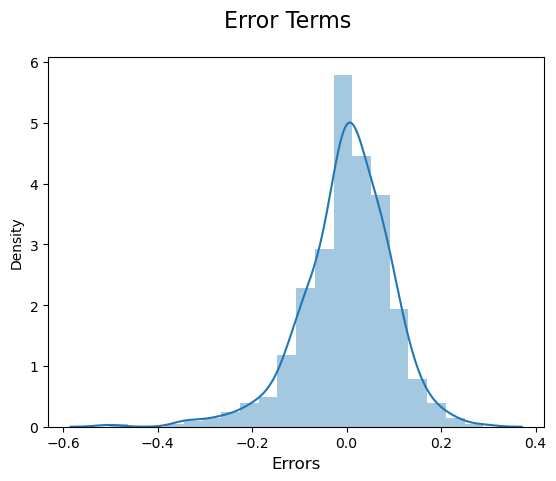

In [289]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                   
plt.xlabel('Errors', fontsize = 12)                         

In [290]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = r2_score(y_train, y_train_pred)

print(rmse_train)

0.8384393907558725


# Making Predictions Using the Final Model

### Applying the scaling on the test sets

In [293]:
scaling_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bikeSharingData_test[scaling_cols] = scaler.transform(bikeSharingData_test[scaling_cols])

In [294]:
bikeSharingData_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_bad,weathersit_good,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.479553,0.027397,0.657534,...,0.068493,0.059361,0.073059,0.063927,0.132420,0.127854,0.123288,0.132420,0.168950,0.141553
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.233091,0.163612,0.475622,...,0.253169,0.236840,0.260830,0.245183,0.339723,0.334692,0.329520,0.339723,0.375566,0.349389
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [296]:
y_test = bikeSharingData_test.pop('cnt')
X_test = bikeSharingData_test

In [297]:
# Adding constant variable to test dataframe
X_test_17 = sm.add_constant(X_test)

In [298]:
# Creating X_test_19 dataframe by dropping variables from X_test_19

X_test_17 = X_test_17.drop(['holiday', 'temp', 'weathersit_good', 'season_summer', 'mnth_aug', 'hum',
       'mnth_feb', 'mnth_jan', 'mnth_jun', 
       'mnth_may', 'mnth_oct', 'weekday_monday',
       'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'], axis = 1)

In [299]:
X_test_17.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'weathersit_bad',
       'weathersit_moderate', 'season_spring', 'season_winter', 'mnth_dec',
       'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_sept', 'weekday_saturday'],
      dtype='object')

In [300]:
# Making predictions using the seventeenth model

y_test_pred = lr_17.predict(X_test_17)

In [301]:
# Calculate mean squared error of the training set
mse_test= mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = r2_score(y_test, y_test_pred)

print(rmse_test)

0.8239144343707601


## Observation: 
We can see that the r_squared on the test set is 0.824 and the r-squared on the trained set 0.838 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data

# Model Evaluation

Text(0, 0.5, 'y_pred')

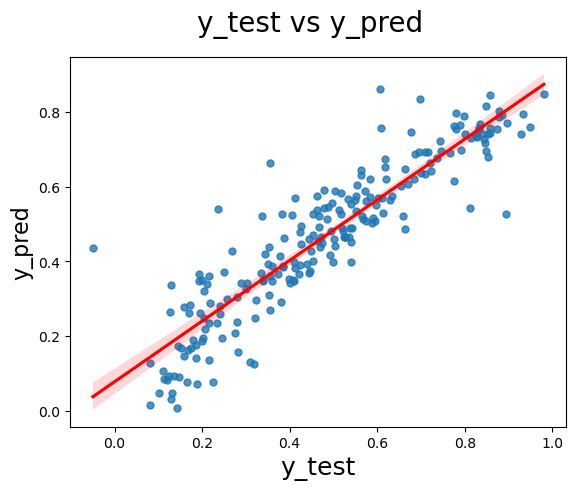

In [304]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25 })
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [305]:
lr_17.params

const                  0.202157
yr                     0.241904
workingday             0.047548
atemp                  0.429001
windspeed             -0.079933
weathersit_bad        -0.274179
weathersit_moderate   -0.084128
season_spring         -0.161711
season_winter          0.083866
mnth_dec              -0.069852
mnth_jul              -0.048212
mnth_mar               0.052729
mnth_nov              -0.085015
mnth_sept              0.051584
weekday_saturday       0.054737
dtype: float64

# Final Conclusions :
### By using the above scatter plot and the parameters , We can see that the equation of our best fitted line is:

cnt = 0.202 + 0.242* yr + 0.047* workingday + 0.429* atemp - 0.079* windspeed - 0.274* weathersit_bad - 0.084* weathersit_moderate - 0.161* season_spring + 0.083* season_winter - 0.069* mnth_dec - 0.048* mnth_jul + 0.052* mnth_mar - 0.085* mnth_nov + 0.051* mnth_sept + 0.054* weekday_saturday

-  Year, workingday, atemp, windspeed, weathersit(bad & moderate), season(winter & spring) month(december, july, march, november, september) & weekday saturday are significant features to predict the demand for shared bikes
  
- All the positive coefficients like yr, workingday, atemp, windspeed, season_winter, mnth_march, mnth_sept &  weekday_saturday indicate that an increase in these values will lead to an increase in the value of cnt.

- All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.
  
- From R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.

Final Recommendations for the Company:
The months - march & september should be considered by the company as they have a higher demand as compared to other months.
With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
demand decreases for bad & moderate weather condition
Holiday time seems to be least interesting for biking, little motavation and marketing might help here